# Import libraries

In [13]:
import tensorflow as tf
#from tensorflow.keras import layers
import tfimm
#import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Path generation

In [19]:
import pathlib
data_dir = pathlib.Path(r"C:\Users\lulu5\Documents\dataset")
#Nombre images
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

2072


In [20]:
batch_size = 32
img_height = 180
img_width = 180

## Data augmentation

In [29]:
TFs = {'height_shift_range':  .5,
       "horizontal_flip": True,
       "vertical_flip": True,
       "rotation_range": 30,
       "featurewise_std_normalization": True,
       "brightness_range": (0.5, 2)
       # other transformation your want
       # ...
       }
datagen = ImageDataGenerator(**TFs)

In [30]:
batches = datagen.flow_from_directory(data_dir,
                                      class_mode='binary',
                                      target_size=(img_height, img_width),
                                      color_mode="rgb",
                                      shuffle=True,
                                      batch_size=batch_size)

Found 2072 images belonging to 10 classes.


In [31]:
batch_x, batch_y = next(batches)
batch_x.shape, batch_y

((32, 180, 180, 3),
 array([4., 4., 4., 9., 4., 2., 4., 2., 5., 4., 4., 4., 4., 4., 4., 4., 3.,
        4., 4., 9., 4., 4., 2., 4., 0., 4., 4., 4., 4., 4., 2., 9.],
       dtype=float32))

ValueError: num must be 1 <= num <= 4, not 5

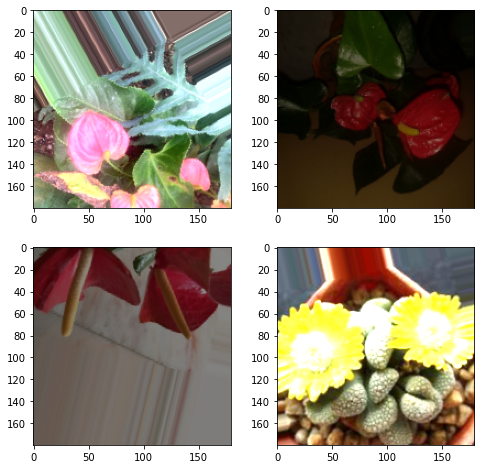

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

for i in range(batch_x.shape[0]):
    plt.subplot(2, 2, i+1)
    result = batch_x[i].astype('uint8')
    plt.imshow(result)

# Modèle

In [ ]:
train_generator = train_datagen.flow_from_directory(
    "../data/train",
    color_mode="rgb",
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical')

test_flow = test_generator.flow_from_directory(
    "../data/valid", class_mode='categorical', 
    color_mode="rgb",                            
    target_size=target_size, 
    batch_size=batch_size)

In [36]:
batches.labels

array([0, 0, 0, ..., 9, 9, 9])

In [10]:
model = tfimm.create_model("vit_tiny_patch16_224", dtype="float32", pretrained=False)

In [7]:
tfimm.list_models()

['cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'convmixer_768_32',
 'convmixer_1024_20_ks9_p14',
 'convmixer_1536_20',
 'convnext_base',
 'convnext_base_384_in22ft1k',
 'convnext_base_in22ft1k',
 'convnext_base_in22k',
 'convnext_large',
 'convnext_large_384_in22ft1k',
 'convnext_large_in22ft1k',
 'convnext_large_in22k',
 'convnext_small',
 'convnext_tiny',
 'convnext_xlarge_384_in22ft1k',
 'convnext_xlarge_in22ft1k',
 'convnext_xlarge_in22k',
 'deit_base_distilled_patch16_224',
 'deit_base_distilled_patch16_384',
 'deit_base_patch16_224',
 'deit_base_patch16_384',
 'deit_small_distilled_patch16_224',
 'deit_small_patch16_224',
 'deit_tiny_distilled_patch16_224',
 'deit_tiny_patch16_224',
 'ecaresnet26t',
 'ecaresnet50d',
 'ecaresnet50t',
 'ecaresnet101d',
 'ecaresnet269d',
 'ecaresnetlight',
 'gmixer_12_224',
 'gmixer_24_224',
 'gmlp_b16_224',
 'gmlp_s16

In [33]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names
)

Found 2072 files belonging to 10 classes.
Using 1658 files for training.
['1373231', '1393242', '1393414', '1396159', '1409238', '1411462', '1412445', '1413751', '1414746', '1418140']
